# Modelo de una compuerta

## Cambio de estado

La probabilidad de que una compuerta esté abierta, como función del tiempo, es una combinación lineal de las probabilidades de que la compuerta se halla cerrado o abierto y las reglas observadas de su comportamiento se describen con una ecuación diferencial.

Este comportamiento se ve afectado por el voltaje de polarización de la membrana, pero para esta sección consideraremos al voltaje como un parámetro fijo, de modo que nos podamos enfocar en la ecuación como función del tiempo.  Tomemos como ejemplo la ecuación para la compuerta de potasio (K).

El cambio en la probabilidad de que una compuerta esté abierta se puede decir que es proporcional a:

\begin{align*}
 \Delta \text{Compuertas abiertas} = \text{Puertas que se abren} - \text{Puertas que se cierran}
\end{align*}

Formalizando, es la suma de la probabilidad de que la compuerta esté cerrada por la probabilidad de que se abra, menos la probabilidad de que haya estado abierta y se cierre. Esto se expresa con una ecuación diferencial:

\begin{equation}
 \frac{1}{\gamma(T)} \frac{dn}{dt} = \alpha_n(V) (1 - n) - \beta_n(V)n \label{eq:huxley_sodio_puerta}
\end{equation}

donde $\gamma(T)$ es una constante de proporcionalidad temporal que depende de la temperatura $T$, **a $6.3°$C vale $1$** [Cessac2009].

### Estado de equilibrio

La ecuación anterior es una ecuación diferencial de primer grado, si bien la ecuación describe la variación de $n$ en el tiempo, existe un punto especial en el cual $n$ ya no cambia.  A éste se le llama un **estado de equilibrio**, matemáticamente corresponde a que su derivada sea cero.

\begin{align}
  \frac{dn}{dt} &= 0
\end{align}

Si sustituimos esta condición en la ecuación anterior obtenemos el valor que toma $n$ al alcanzar el equilibrio, al cual llamaremos $n_{\infty}$; esto como función del voltaje de polarización actual $V$:
\begin{align}
 \alpha_n(V) (1 - n_{\infty}) - \beta_n(V)n_{\infty} &= 0 \\
 n_{\infty}(V) &= \frac{\alpha_n(V)}{\alpha_n(V) + \beta_n(V)}
\end{align}


### Constante temporal

Se define ahora a la constante temporal:
\begin{align*}
 \tau_n(V) &= \frac{1}{\alpha_n(V) + \beta_n(V)}
\end{align*}

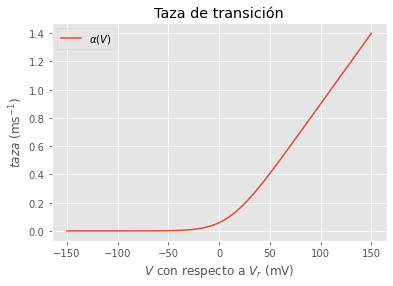

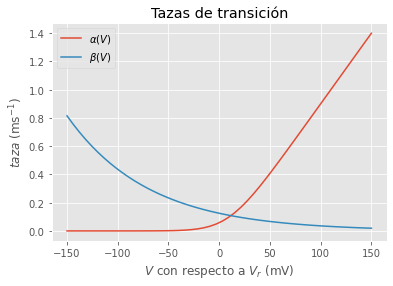

In [1]:
%run Funciones\ de\ transición.ipynb

In [2]:
def n_inf(alfa, beta):
    """
    Probabilidad de que una compuerta esté abierta.
    """
    return alfa / (alfa + beta)

def tau_inf(alfa, beta):
    """
    Constante temporal.
    """
    return 1/(alfa + beta)

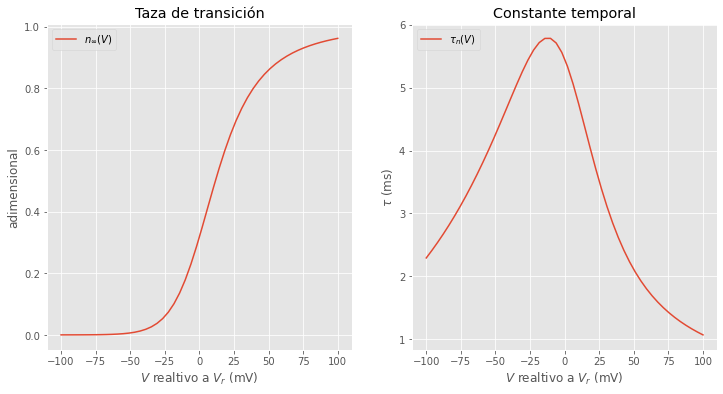

In [3]:
def plotParameters():
    """
    Grafica alfa y beta como función del voltaje.
    """
    fig, axes = plt.subplots(1, 2, figsize=(12,6))
    V = np.linspace(-100, 100)
    
    alpha = alpha_n(V)
    beta = beta_n(V)
    axes[0].plot(V, n_inf(alpha, beta), label="$n_{\infty}(V)$")
    axes[1].plot(V, tau_inf(alpha, beta), label="$\\tau_{n}(V)$")
    
    axes[0].set_title("Taza de transición")
    axes[0].set_xlabel("$V$ realtivo a $V_r$ (mV)")
    axes[0].set_ylabel("adimensional")
    axes[0].legend(loc=2)
    axes[1].set_title("Constante temporal")
    axes[1].set_xlabel("$V$ realtivo a $V_r$ (mV)")
    axes[1].set_ylabel("$\\tau$ (ms)")
    axes[1].legend(loc=2)
plotParameters()
    

### Ecuación de transición

Es costumbre reescribir la ecuación diferencial original en términos de $n_{\infty}$ y $\tau_n$:

\begin{align}
 \frac{1}{\gamma(T)} \frac{dn}{dt} &= \frac{n^{\infty}(V) - n}{\tau_n(V)}
\end{align}

## Solución numérica

Para obtener el valor de $n$ al tiempo $t$ dado un voltaje fijo $V$ utlizaremos el método de **Euler** para resolver numéricamente ecuaciones diferenciales de primer orden.  Si bien existe una solución simbólica para este problema, no nos servirá cuando queramos recuperar el hecho de que el voltaje no permanece constante.

### Método de Euler para la ecuación de la compuerta

Aplicando esta fórmula a la ecuación para el canal de potasio:

\begin{align}
 \frac{dn}{dt} &= \frac{n^{\infty}(V) - n(t)}{\tau_n(V)}
\end{align}

Obtenemos:

\begin{align}
 n(t + \Delta t) =& n(t) + \Delta t \left[\frac{n^{\infty}(V) - n(t)}{\tau_n(V)} \right] \\
                 =& \left[ 1 - \frac{\Delta t}{\tau_n(V)} \right] n(t) + \frac{\Delta t}{\tau_n(V)}n^{\infty}(V)
\end{align}

# Implementación

In [4]:
from ipywidgets import interact_manual
import ipywidgets as widgets

In [5]:
def compuerta_de_potasio(n_0, voltaje):
    """
    Aplicación del método de Euler para aproximar n(t) cuando
    el voltaje es fijo.
    """
    delta = 0.01
    max_t = 50.0      # ms
    
    t = np.arange(0, max_t, delta)    # tiempos
    n = np.zeros(len(t))
    
    # Los siguientes valores son constantes sólo si el voltaje
    # es constante.  Si no lo es, deben ser calculados para
    # cada t como función de V(t).
    
    alfa = alpha_n(voltaje)          # para el voltaje dado
    beta = beta_n(voltaje)
    tau  = tau_inf(alfa, beta)
    nInf = n_inf(alfa, beta)
    
    n[0] = n_0                       # valor inicial propuesto
    for i in range(len(t) - 1):      # para cada paso temporal
        # Aproximar el siguiente valor de n
        n[i + 1] = (1 - delta/tau) * n[i] + delta * nInf / tau
    return {'t':t, 'n':n}

In [6]:
def plot_potasio(resultado):
    """
    Grafica n(t) vs t según fue aproximada por Euler.
    """
    tiempo = resultado['t']
    plt.plot(tiempo, resultado['n'])
    plt.title("Taza de transición $n(t)$")
    plt.xlabel("t (ms)")
    plt.ylabel("adimensional")

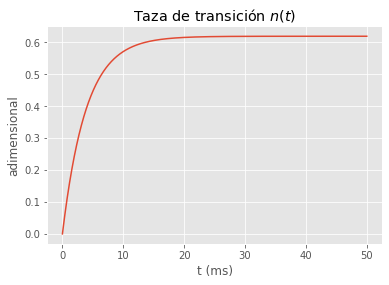

In [7]:
# Resultado para el punto inicial (n=0, V=20)

plot_potasio(compuerta_de_potasio(0, 20))

In [8]:
@interact_manual(
    n_0 = widgets.FloatSlider(min=-1.0, max=1.0, step=0.01, value=0),
    V = widgets.FloatSlider(min=-90, max=120, step=1, value=0),
)
def euler_n(n_0, V):
    """
    Ejecuta la simulación para el valor inicial y voltaje indicados.
    """
    resultado = compuerta_de_potasio(n_0, V)
    plot_potasio(resultado)

interactive(children=(FloatSlider(value=0.0, description='n_0', max=1.0, min=-1.0, step=0.01), FloatSlider(val…